# Binding site of a protein-ligand complex

In this notebook we explore the binding site of two different protein ligand-complexes.

We'll start by loading the complexes structures from a pdb file. We then proceed to prepare the ligand and the 
protein so we can extract and visualize the binding site of the protein

In [1]:
import openpharmacophore as oph

## PDB 3BBH

We start with the structure with PDB ID 3BBH. This file was already pretreated, so the protein contains hydrogens, and there is only
a single chain.

In [2]:
protein = oph.load("../../data/3bbh_hyd.pdb")
print(f"Has hydrogens: {protein.has_hydrogens}")
print(f"Has ligand: {protein.has_ligands}")

Has hydrogens: <bound method Protein.has_hydrogens of <openpharmacophore.molecular_systems.protein.Protein object at 0x7fe2332db790>>
Has ligand: <bound method Protein.has_ligands of <openpharmacophore.molecular_systems.protein.Protein object at 0x7fe2332db790>>


A protein may contain one or multiple ligands. To extract one we need to know its id. We can view
the id of all the ligans in the protein by calling the attribute ```ligand_ids```

In [3]:
lig_ids = protein.ligand_ids()
print(lig_ids)

['SFG:B']


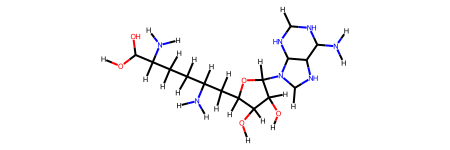

In [4]:
ligand = protein.get_ligand(lig_ids[0])
ligand.draw()

We fix the ligand. Its bond orders are correct now

[16:54:42] WARNING: More than one matching pattern found - picking one



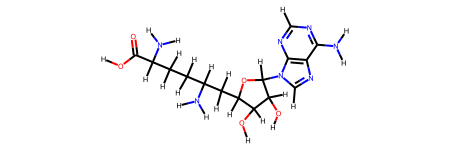

In [5]:
ligand.fix_bond_order(
        smiles="c1nc(c2c(n1)n(cn2)[C@H]3[C@@H]([C@@H]([C@H](O3)C[C@H](CC[C@@H](C(=O)O)N)N)O)O)N"
)
ligand.draw()

Now we can remove the ligand from the protein

In [6]:
protein.remove_ligand(lig_ids[0])
print(f"Has ligand: {protein.has_ligands}")

Has ligand: <bound method Protein.has_ligands of <openpharmacophore.molecular_systems.protein.Protein object at 0x7fe2332db790>>


We create a binding site to obtain the receptor chemical features

In [7]:
bsite = oph.ComplexBindingSite(protein, ligand)

# Extract chemical features and visualize them
receptor_feats = bsite.get_chem_feats(frame=0)
ligand_feats = ligand.get_chem_feats(conf_ind=0)

print(f"Found {len(receptor_feats)} chemical features in receptor")
print(f"Found {len(ligand_feats)} chemical features in ligand")

Found 492 chemical features in receptor
Found 20 chemical features in ligand


Finally we visualize the binding site with the chemical

In [8]:
viewer = oph.Viewer()
viewer.add_components([bsite, ligand, ligand_feats])

In [9]:
view = viewer.show()
viewer.set_protein_style("ball+stick")
view

NGLWidget()

<img src="../../../../_static/bsite_3bbh.png" alt="pharmacophore">

## PDB 1M7W

In [10]:
protein_2 = oph.load("../../data/1m7w_A_chain.pdb")
print(f"Has hydrogens: {protein_2.has_hydrogens}")
print(f"Has ligand: {protein_2.has_ligands}")

Has hydrogens: <bound method Protein.has_hydrogens of <openpharmacophore.molecular_systems.protein.Protein object at 0x7fe232f37dd0>>
Has ligand: <bound method Protein.has_ligands of <openpharmacophore.molecular_systems.protein.Protein object at 0x7fe232f37dd0>>


In [11]:
lig_ids = protein_2.ligand_ids()
print(lig_ids)

['DAO:B']


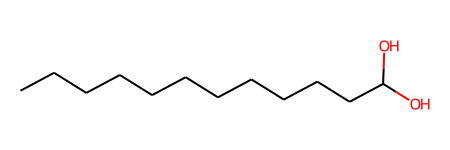

In [12]:
ligand_2 = protein_2.get_ligand(lig_ids[0])
ligand_2.draw()

[16:54:43] WARNING: More than one matching pattern found - picking one



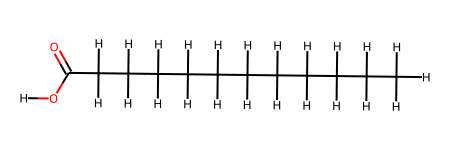

In [13]:
ligand_2.fix_bond_order(smiles="CCCCCCCCCCCC(=O)O")
ligand_2.add_hydrogens()
ligand_2.draw()

In [14]:
protein_2.remove_ligand(lig_ids[0])
print(f"Has ligand: {protein_2.has_ligands}")

Has ligand: <bound method Protein.has_ligands of <openpharmacophore.molecular_systems.protein.Protein object at 0x7fe232f37dd0>>


In [15]:
protein_2.add_hydrogens()
print(f"Has hydrogens: {protein_2.has_hydrogens}")

Has hydrogens: <bound method Protein.has_hydrogens of <openpharmacophore.molecular_systems.protein.Protein object at 0x7fe232f37dd0>>


In [16]:
bsite_2 = oph.ComplexBindingSite(protein_2, ligand_2)

receptor_feats_2 = bsite_2.get_chem_feats(frame=0)
ligand_feats_2 = ligand_2.get_chem_feats(conf_ind=0)

print(f"Found {len(receptor_feats_2)} chemical features in receptor")
print(f"Found {len(ligand_feats_2)} chemical features in ligand")

Found 652 chemical features in receptor
Found 9 chemical features in ligand


In [17]:
viewer_2 = oph.Viewer()
viewer_2.add_components([bsite_2,ligand_2, ligand_feats_2])

In [18]:
view_2 = viewer_2.show()
viewer_2.set_protein_style("ball+stick")
view_2

NGLWidget()

<img src="../../../../_static/bsite_1m7w.png" alt="pharmacophore">
<div class="alert alert-info">
    <strong>Note:</strong>
    <p>view and view_2 display an interactive widget. For simplicity an image is presented in the documentation.</p>
</div>

In [19]:
# Save view image so it can be viewed in the documentation
 
import time
import threading

save = False

def save_image(view):
    im = view.render_image()
    while not im.value:
        time.sleep(0.1)
    save_path = "../../../../_static/bsite_3bbh.png"
    with open(save_path, "wb") as fp:
        fp.write(im.value)    

def generate_image():
    thread = threading.Thread(target=save_image, args=(viewer.to_nglview(),), daemon=True)
    thread.start()
    

if save:
    generate_image()